In [1]:
using DFWannier
using Plots
assets_dir = joinpath(splitdir(pathof(DFWannier))[1], "../test/assets")

"/home/runner/work/DFWannier.jl/DFWannier.jl/src/../test/assets"

We can use a .chk and .eig file to construct a tight binding Hamiltonian
in the Wannier basis.

In [2]:
hami = read_hamiltonian(joinpath(assets_dir, "Fe/Fe.chk"), joinpath(assets_dir, "Fe/Fe.eig"))

15-element Vector{DFWannier.TBBlock{Float64, Unitful.Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}, Matrix{ComplexF64}}}:
 DFWannier.TBBlock{Float64, Unitful.Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}, Matrix{ComplexF64}}([-1, 0, -1], Unitful.Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}[-2.8699925907878647 Å, 0.0 Å, 0.0 Å], ComplexF64[0.18378809813564811 - 6.938893903907228e-18im -1.4953881327730748e-7 - 4.289271413742659e-8im … -3.1647709131224543e-7 - 0.0005968481866934913im -1.0253529552034803e-7 + 3.403728759188336e-7im; -1.4953881327641984e-7 + 4.289271413699295e-8im 0.16450701207571727 + 1.5612511283791264e-17im … -2.115654147688665e-7 + 2.6535938264921446e-8im 1.406539455243408e-7 + 0.0005022219781852081im; … ; -3.164770913190759e-7 + 0.0005968481866934845im -2.115654147689207e-7 - 2.6535938265788748e-8im … 0.1445302037056797 + 8.673617379884035e-19im -3.3224068462350165e-7 + 1.0006180062612284e-6im; -1.025352955210121e-7 - 3.4037287591967

We can the generate the bandstructure by first defining a k-path and then perform the
interpolation.

In [3]:
structure = read_w90_input(joinpath(assets_dir, "Fe/Fe.win")).structure

Structure
    volume: 11.81986011181875 Å^3
    cell parameters:
	 a = (1.4349963016662102 Å, 1.4349963016662102 Å, 1.4349963016662102 Å)
	 b = (-1.4349963016662102 Å, 1.4349963016662102 Å, 1.4349963016662102 Å)
	 c = (-1.4349963016662102 Å, -1.4349963016662102 Å, 1.4349963016662102 Å)
    nat: 1
    ntyp: 1
    Atoms:
Fe [0.0, 0.0, 0.0]


First we create some high symmetry kpoints
then we explicitely interpolate between the high symmetry kpoints to form
`bands_kpoints`.

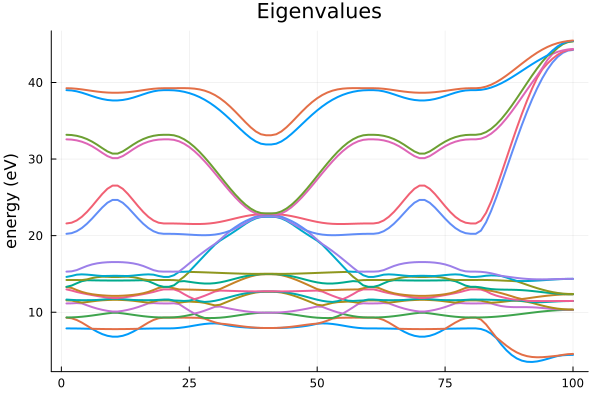

In [4]:
kpoints = [Vec3(0.0, 0.0, 0.5),
           Vec3(0.0, 0.5, 0.5),
           Vec3(0.5, 0.5, 0.5),
           Vec3(0.5, 0.5, 0.0),
           Vec3(0.5, 0.0, 0.0),
           Vec3(0.0, 0.0, 0.0)]
band_kpoints = eltype(kpoints)[]
for i = 1:length(kpoints)-1
    for α in range(0, 1, 20)
        push!(band_kpoints, Vec3((1-α) .* kpoints[i] .+ α .* kpoints[i+1]))
    end
end
bands = wannierbands(hami, band_kpoints)

plot(bands)

We can also construct a colinear Tight Binding Hamiltonian by
reading the outputs of up and down Wannierizations

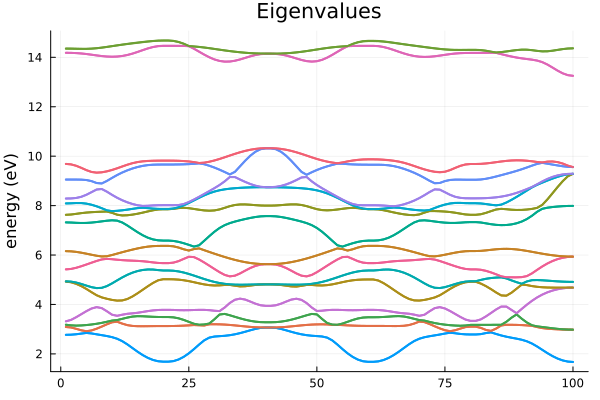

In [5]:
hami = read_hamiltonian(joinpath(assets_dir, "wanup.chk"),
                        joinpath(assets_dir, "wandn.chk"),
                        joinpath(assets_dir, "wanup.eig"),
                        joinpath(assets_dir, "wandn.eig"))
structure = read_w90_input(joinpath(assets_dir, "wanup.win")).structure
bands = wannierbands(hami, band_kpoints)

plot(bands)